# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

In [1]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib seaborn sklearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.cluster.hierarchy as sch
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocessing
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [3]:
dataframe = pd.read_csv('Wholesale_Data.csv')
dataframe.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


After looking at the Kaggle link, here at the descriptors of the column variables 
Channel is nominal 
Region is nominal 
Fresh - annual spending on fresh products 
Milk - annual spending on milk products 
Grocery - annual spending on grocery products 
Frozen - annual spending on frozen products 
Detergents and Paper - annual spending on detergents products
Delicassen - annual spending on delicassen products

In [4]:
#Check for missing values
dataframe.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

There are no null values in the dataset, which is a good sign for us. Now, let’s check the data types of the columns.

In [5]:
#datatypes 
dataframe.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [6]:
#Change channel and region to object
dataframe['Channel'] = dataframe['Channel'].astype('object')
dataframe['Region'] = dataframe['Region'].astype('object')

In [7]:
dataframe.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Looking at this table, I can see that the standard deviation for the all of the variables is quite high which suggests that there may be a bunch of high outliers present in the dataframe. The maximum values are significantly higher than the 75% mark, 10 times more in some cases. 

Now we will perform some exploratory data analysis to understand the data better.
This will help us to understand the data distribution and the relationship between the variables.
We will use the following plots to understand the data better:
1. Pairplot
2. Correlation matrix and heatmap
3. Boxplot
4. Histogram

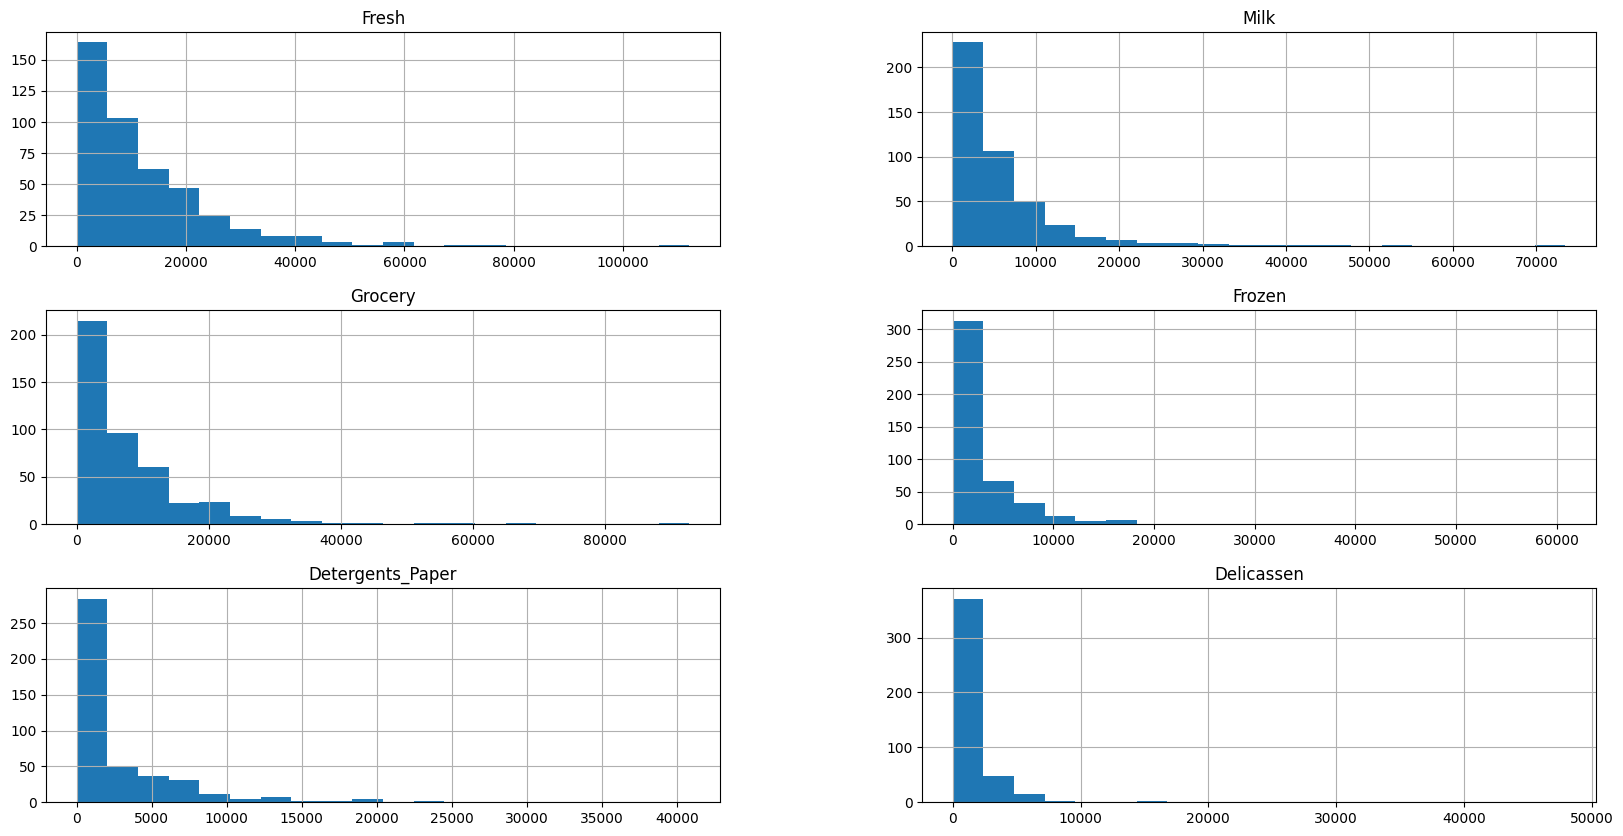

In [8]:
#plots 
#histogram of all the continuous variables
dataframe.hist(bins=20, figsize=(20,10))
plt.show()
#they are all right skewed


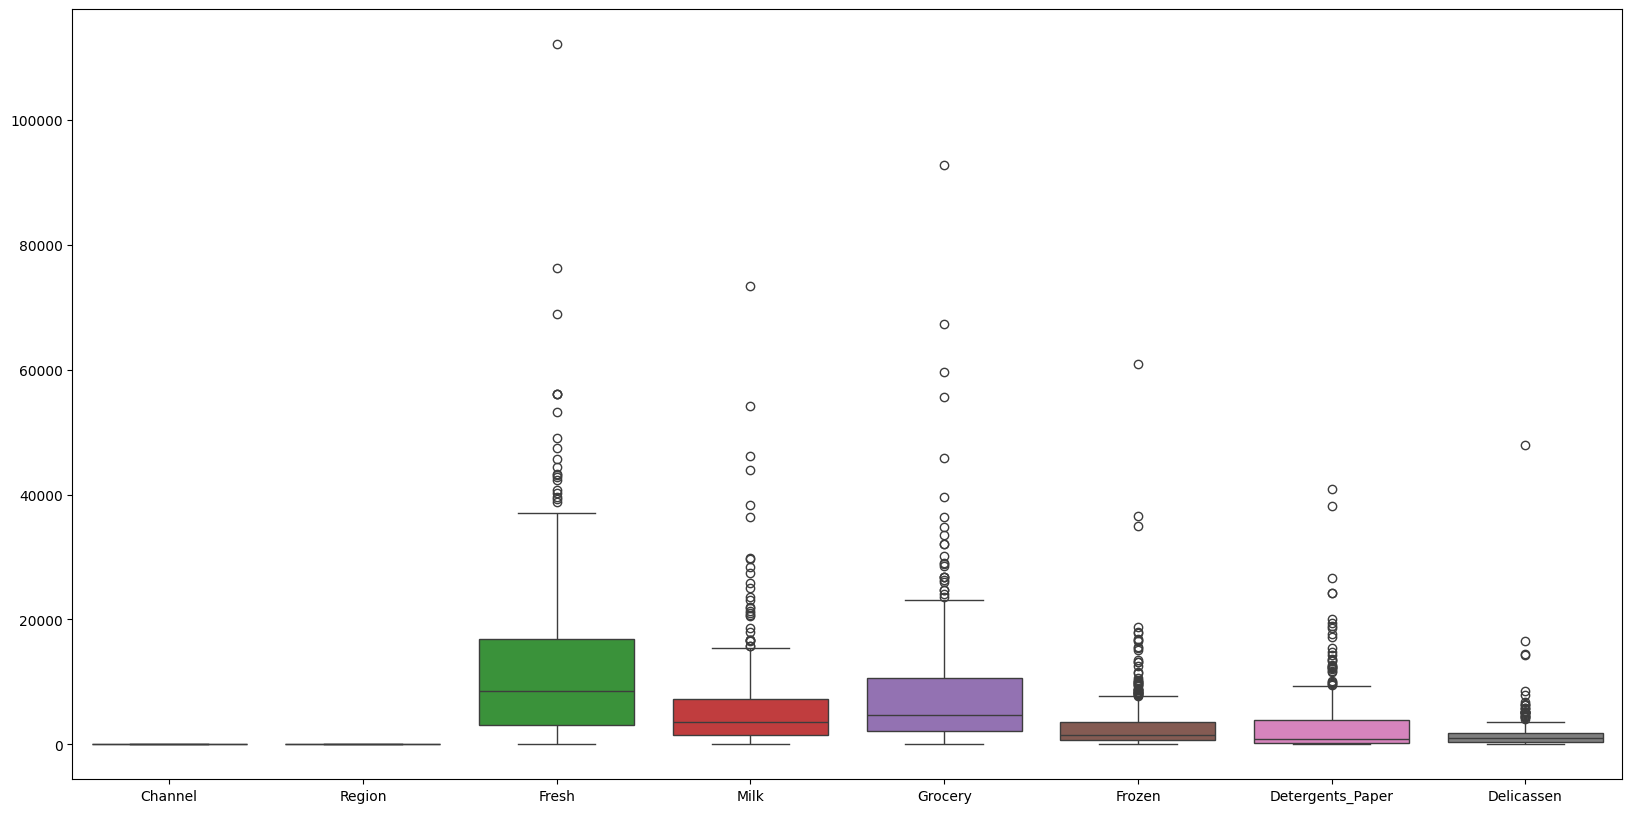

In [9]:
#Boxplot of all the continuous variables
plt.figure(figsize=(20,10))
sns.boxplot(data=dataframe)
plt.show()

As we can see, all the continuous variables have a right skewed distribution and have outliers. We will use log transformation to normalize the data and remove the outliers.
This is as log transformation is used to stabilize variance, make the data more normal distribution-like, improve the validity of measures of association, and make the data more interpretable.
Earlier, I used the IQR method to remove the outliers, but it was not super effective. So, I will use the log transformation method to remove the outliers.

In [11]:
numerical = dataframe.select_dtypes(include=['int64'])
numerical.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [12]:
#Log transformation of the data
log_data = np.log(numerical)
log_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


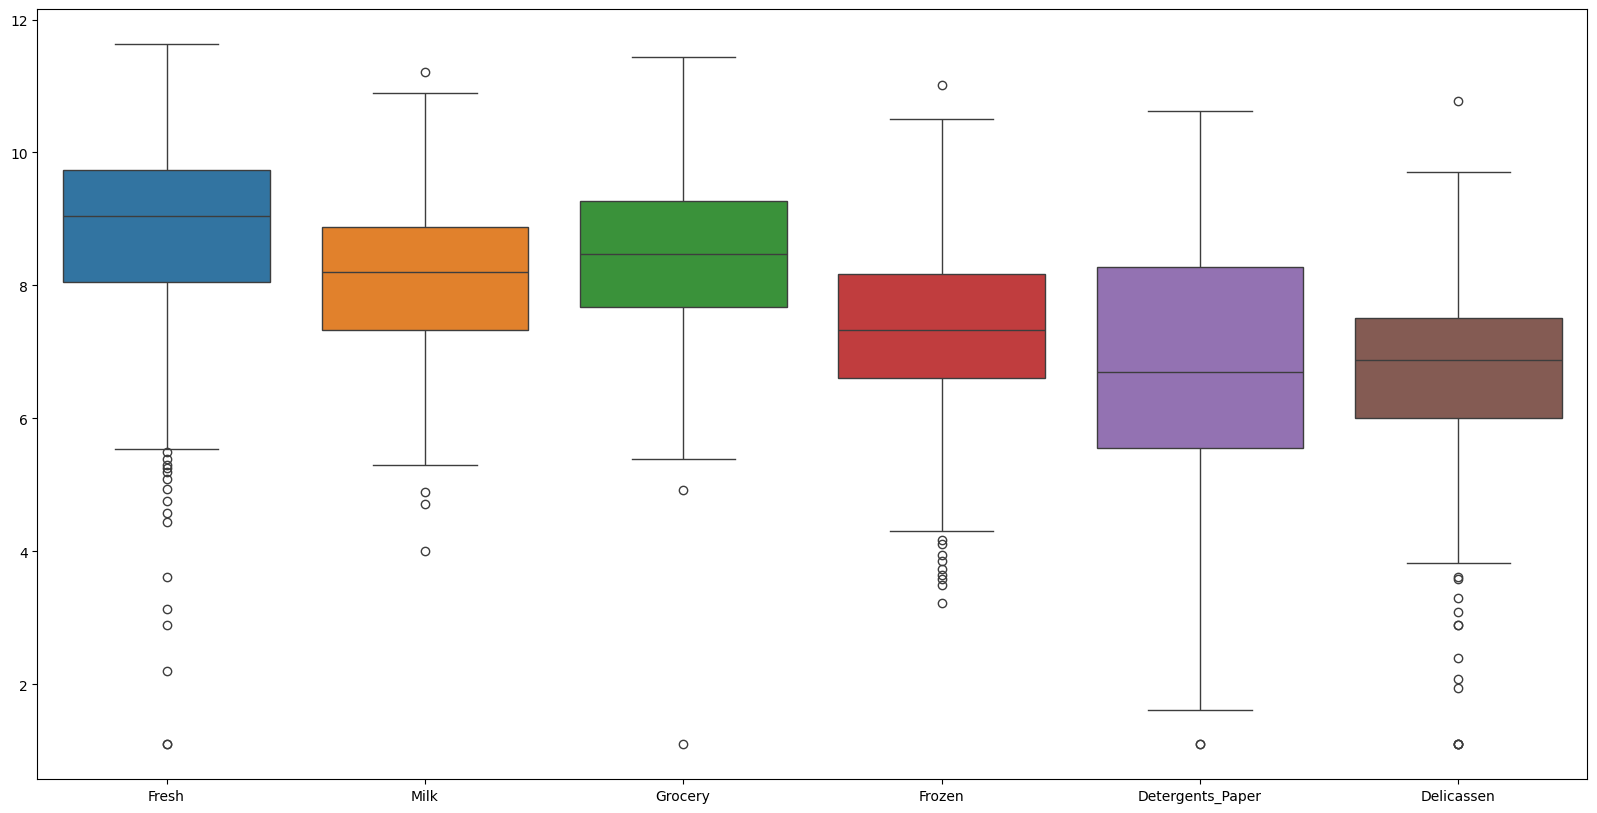

In [13]:
#Boxplot of all the continuous variables after log transformation
plt.figure(figsize=(20,10))
sns.boxplot(data=log_data)
plt.show()

<Figure size 2000x1000 with 0 Axes>

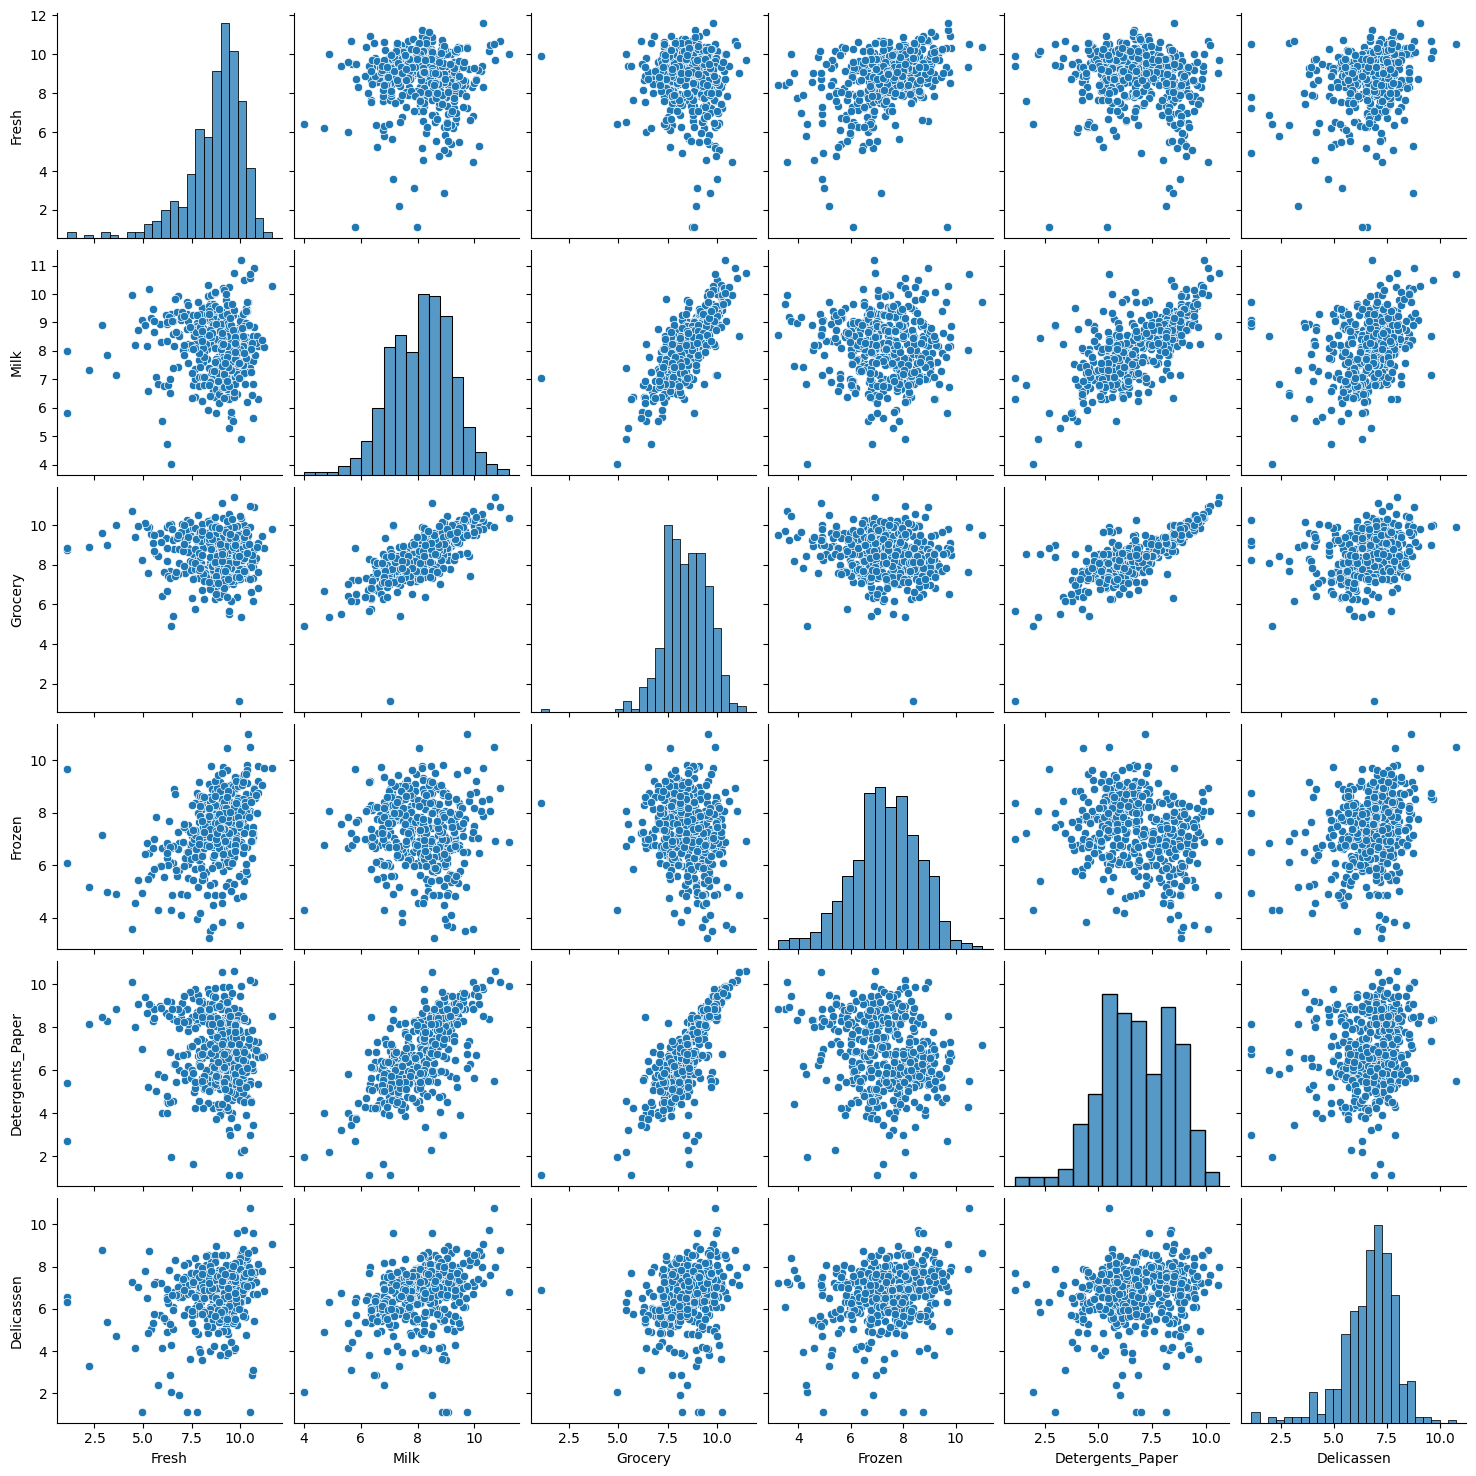

In [14]:
#Scatter plot of all the continuous variables, no channel and region 
plt.figure(figsize=(20,10))
sns.pairplot(log_data)
plt.show()

Checking a relationship that seems to be linear between two variables in the pairplot. We can do this using a regression plot. 

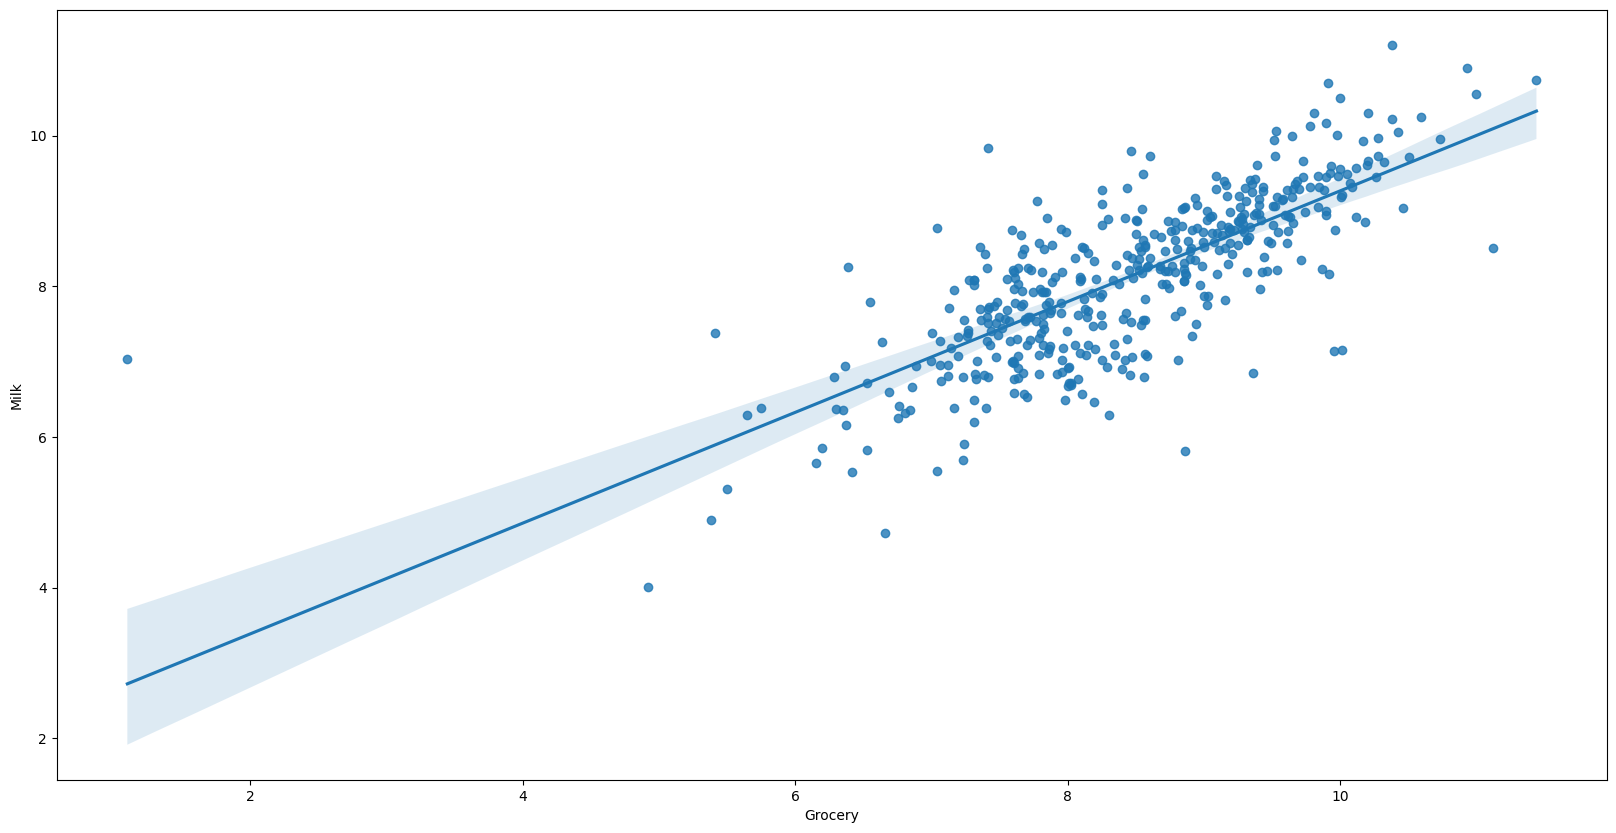

In [15]:
plt.figure(figsize=(20,10))
sns.regplot(data=log_data, x='Grocery', y='Milk')
plt.show()

This shows that there does seem to be a linear relationship between Milk and Grocery spending, which does align with common user patterns. 

Now we will use a correlation matrix to check for multicollinearity between the variables. We will use a heatmap to visualize the correlation matrix. This will also help us confim the associations between the variables we have briefly seen in the pairplot above. 

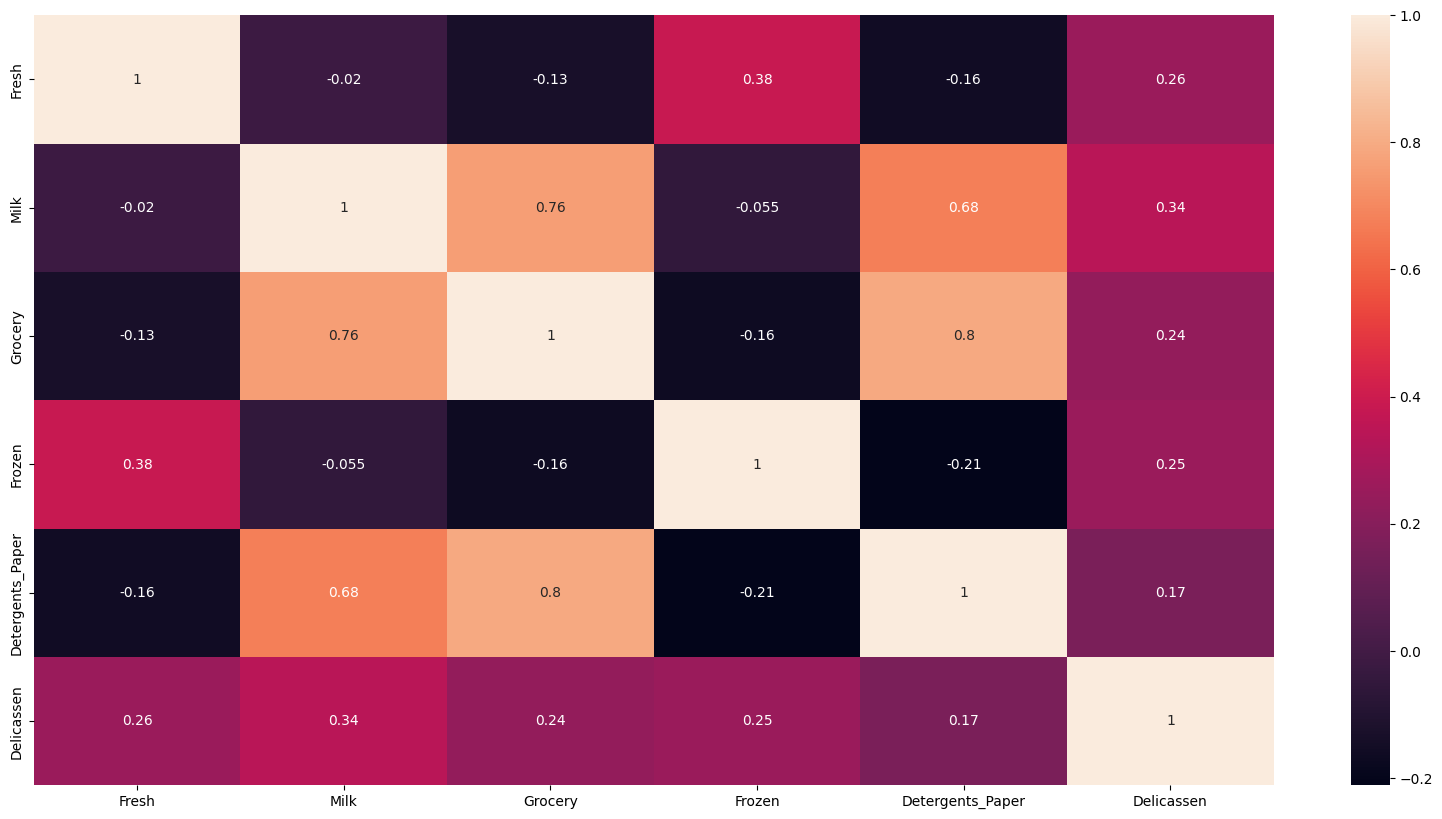

In [17]:
#Correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(log_data.corr(), annot=True)
plt.show()

As we have seen, Grocery and Milk and Detergents_Paper and Milk have a very high correlation coefficient. We can consider removing Detergents_Paper and Milk from our data and se if the model improves. 

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

Preprocessing is not required as the data is already scaled and there are no missing values.
To determine the optimal number of clusters, we will use the elbow method.
The elbow method plots the value of the cost function produced by different values of k. The value of k at which the cost function starts to decrease more slowly is the optimal number of clusters.

In [31]:
#Combine log_data with channel and region

In [32]:
channel = dataframe['Channel'].astype('category')
region = dataframe['Region'].astype('category')

In [33]:
data_f = pd.concat([log_data, channel, region], axis=1)

In [34]:
data_f.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel,Region
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,2,3
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,2,3
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,2,3
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,1,3
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,2,3


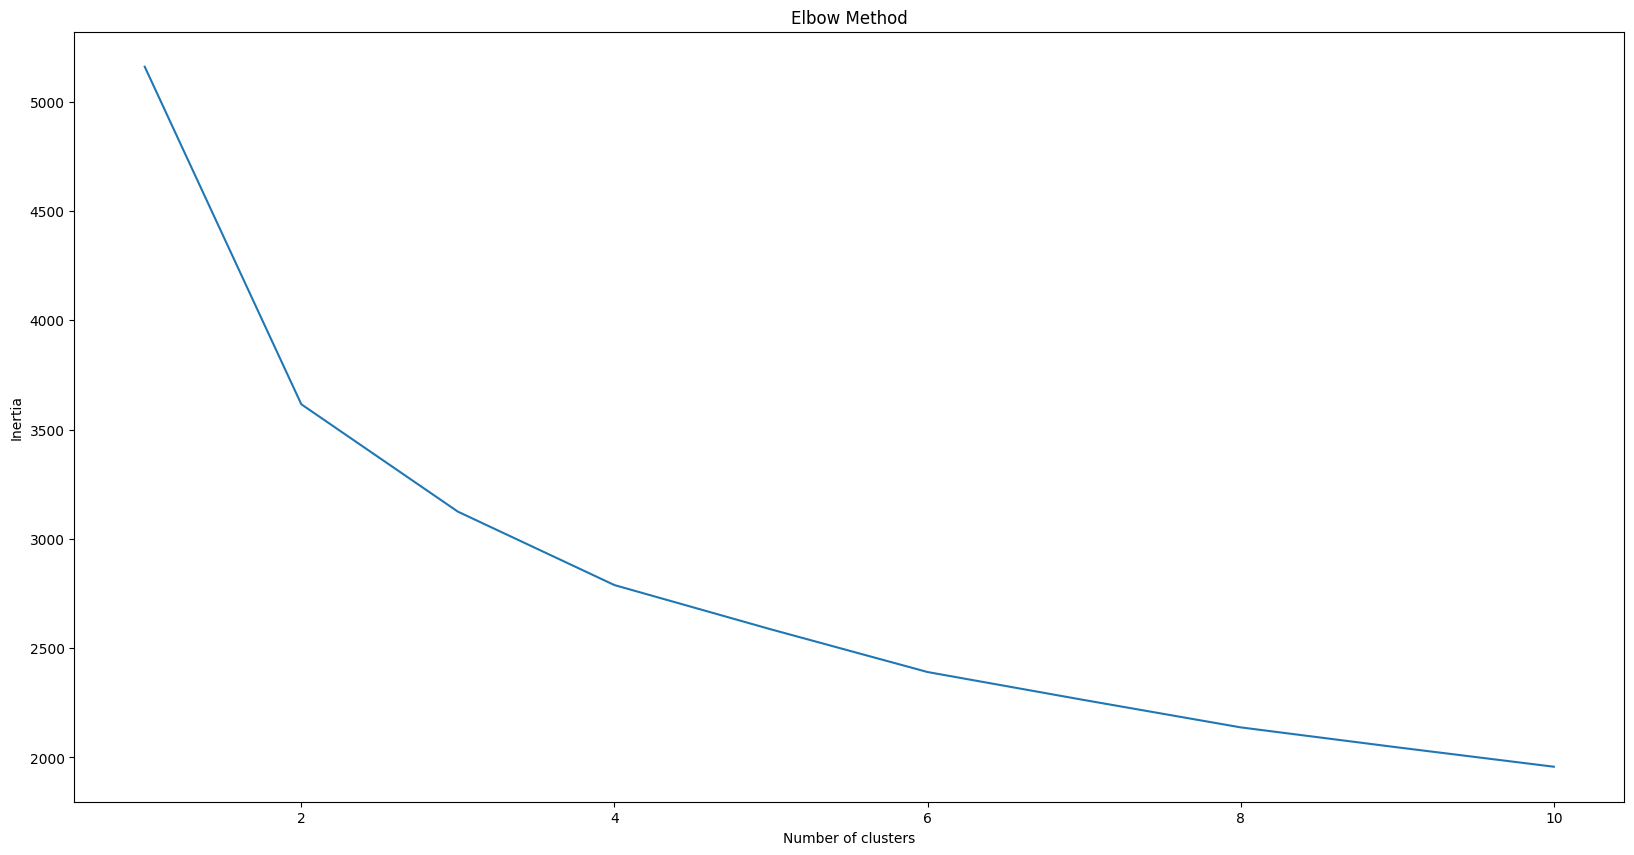

In [35]:
#Creating an initial list 
inertia = []
#Creating a loop to find the optimal number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_f)
    inertia.append(kmeans.inertia_)
#Plotting the elbow method
plt.figure(figsize=(20,10))
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



The elbow method shows that the optimal number of clusters is 2.
We will now use the KMeans algorithm to cluster the data into 2 clusters.

Train test split in unsupervised learning is not necessary as we are not predicting anything. We are just trying to find patterns in the data.
However, it is important for model evaluation.

In [37]:
#3 clusters seems to be the optimal number of clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_f)
dataframe['k_Cluster'] = kmeans.predict(data_f)   #predicting the cluster

In [38]:
dataframe.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,k_Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


Here, we can see that the values either 1 or 0 have been assigned to the rows, depending on what cluster they are belonging to.

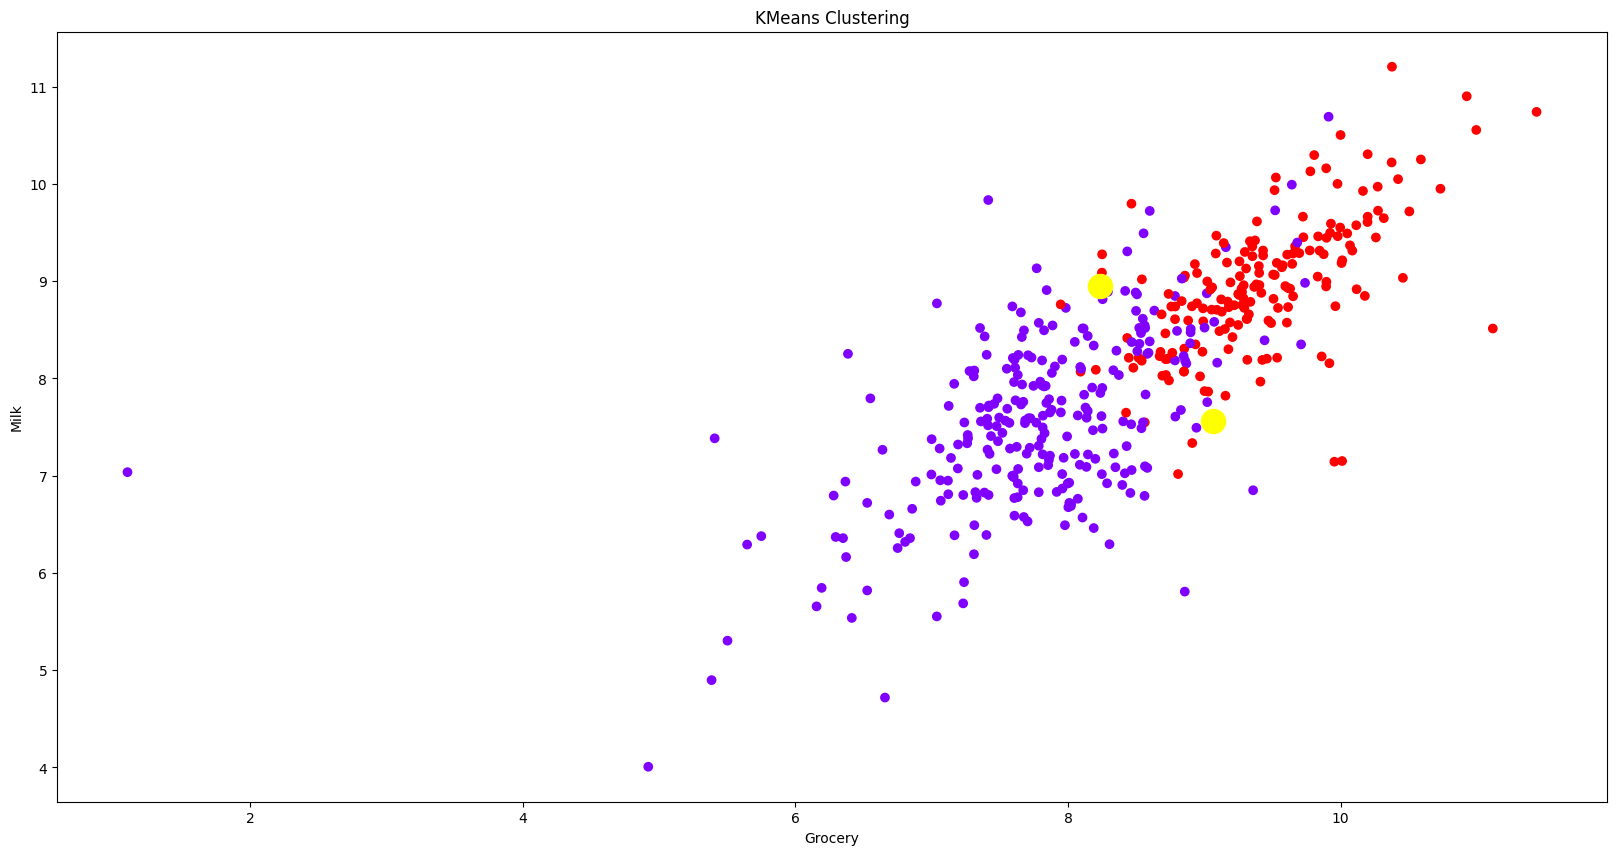

In [46]:
#Centroids of the clusters
#The centroids of the clusters are the same as the mean of the clusters
kmeans.cluster_centers_
#Plotting the clusters
plt.figure(figsize=(20,10))
plt.scatter(data_f['Grocery'], data_f['Milk'], c=dataframe['k_Cluster'], cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow')
plt.title('KMeans Clustering')
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.show()

#Dropping two columns to see if it improves centroid position

In [49]:
data_f.drop('Grocery', axis=1, inplace=True)

In [51]:
data_f.drop('Detergents_Paper', axis=1, inplace=True)

In [52]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_f)
dataframe['kk_Cluster'] = kmeans.predict(data_f)

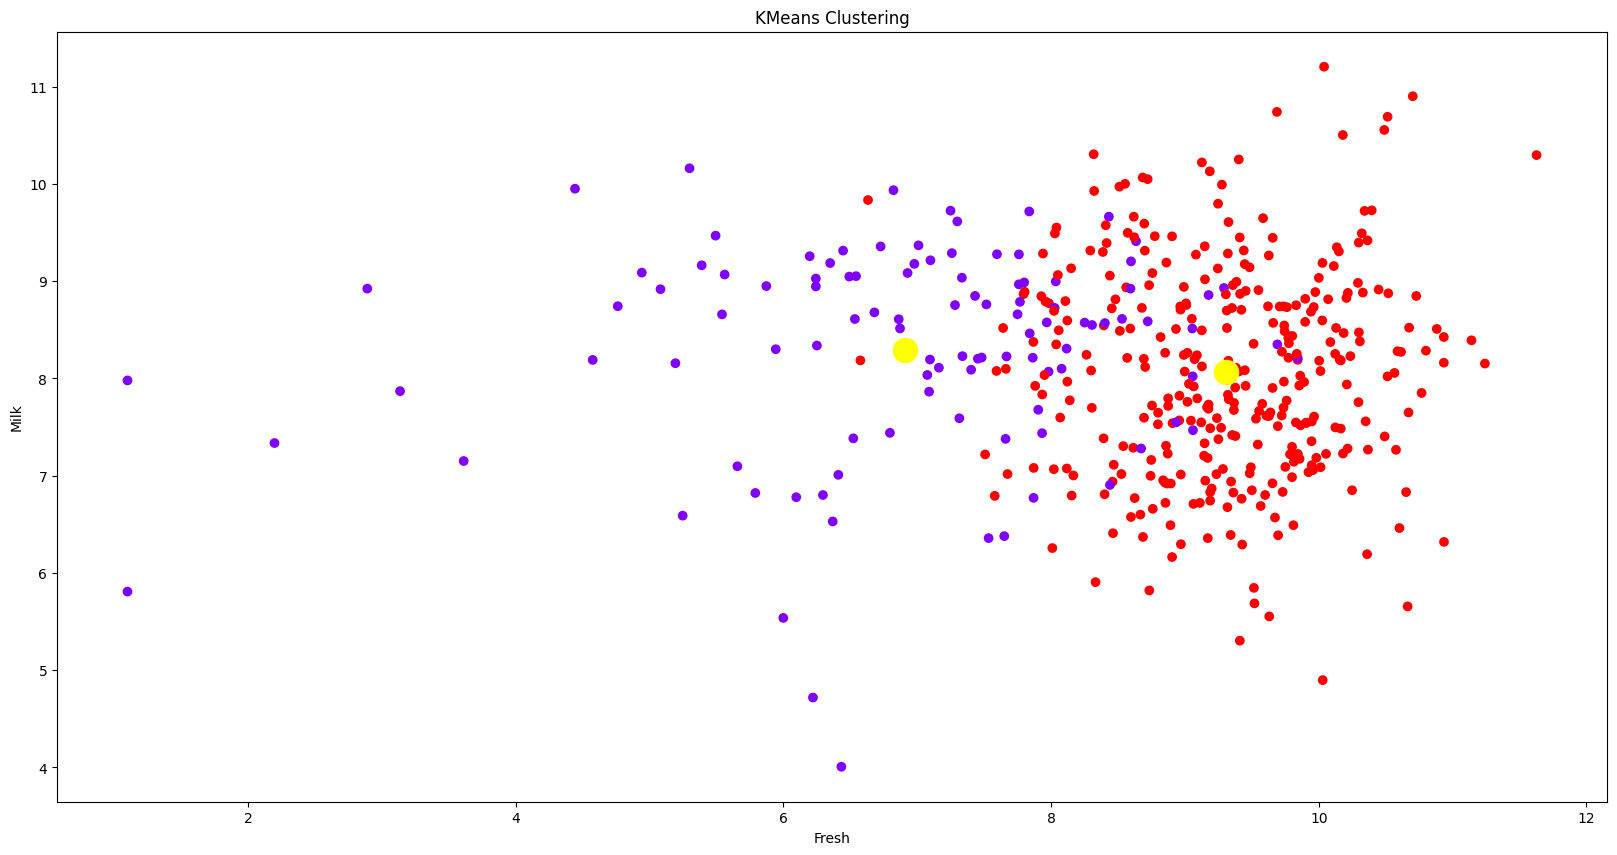

In [54]:
plt.figure(figsize=(20,10))
plt.scatter(data_f['Fresh'], data_f['Milk'], c=dataframe['kk_Cluster'], cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow')
plt.title('KMeans Clustering')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()

Now we can see that the clusters are more distinct and the centroids are more accurate (center of the clusters)

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

Similarly, there is no need to scale the data for hierarchical clustering. We will use the same data_f dataframe for hierarchical clustering.
To determine the optimal number of clusters, we will use the dendrogram here. 

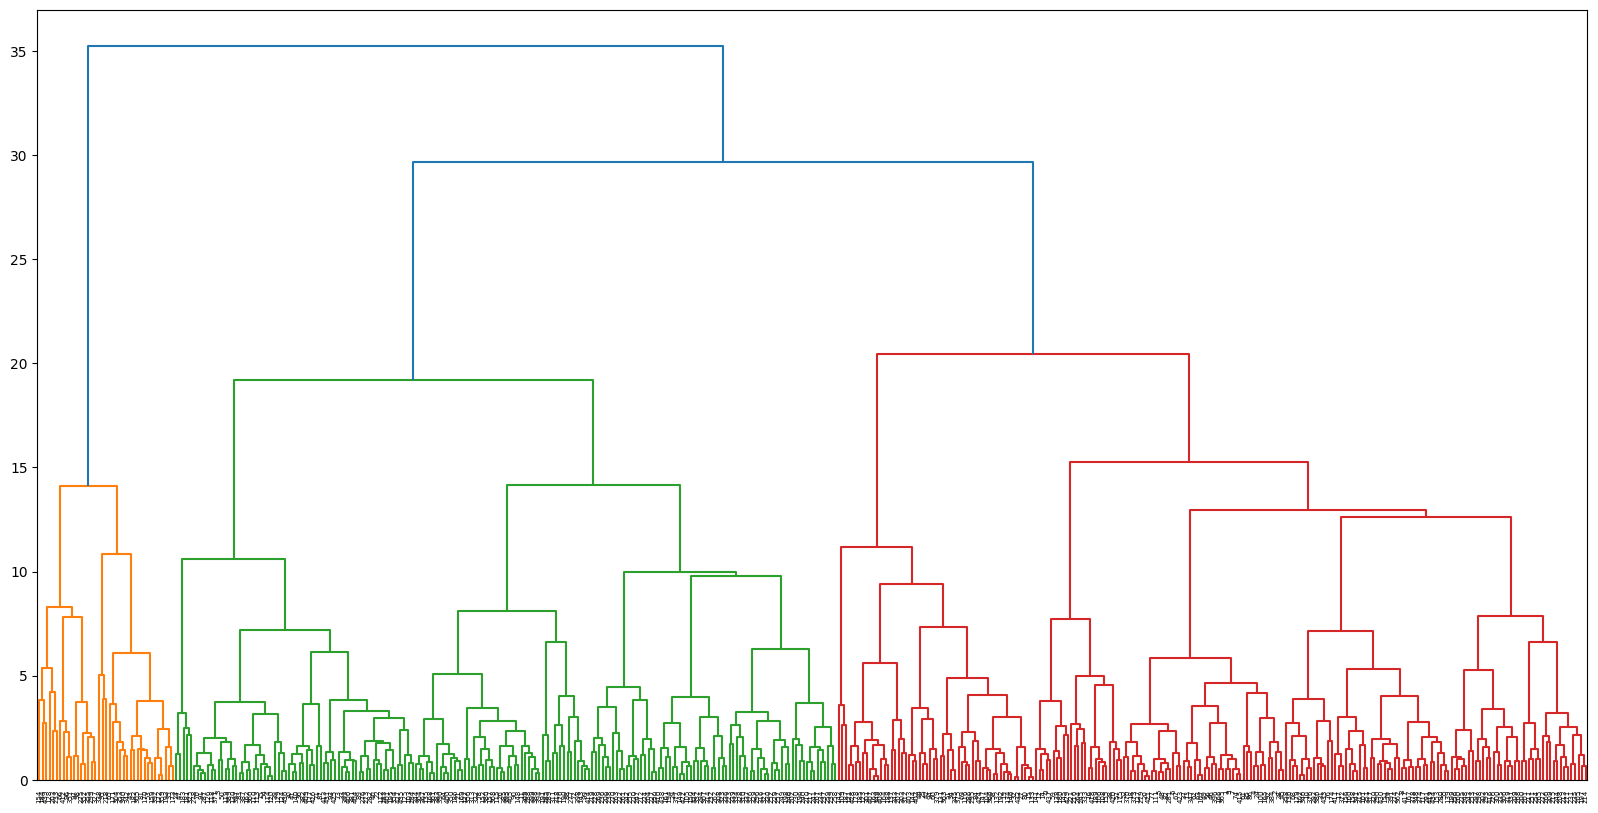

In [55]:
#Creating a dendrogram
plt.figure(figsize=(20,10))
dendrogram(linkage(data_f, method='ward'))
plt.show()

As we can see here, there are clearly three clusters. Also colored by the dendrogram. 
Now we will create the clusters and predict which cluster the rows will belong to, as before. 

In [56]:
#Creating 2 clusters
agg = AgglomerativeClustering(n_clusters=3)
dataframe['H_Cluster'] = agg.fit_predict(data_f)

In [57]:
dataframe.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,k_Cluster,H_Cluster,kk_Cluster
0,2,3,12669,9656,7561,214,2674,1338,1,0,1
1,2,3,7057,9810,9568,1762,3293,1776,1,0,1
2,2,3,6353,8808,7684,2405,3516,7844,1,0,1
3,1,3,13265,1196,4221,6404,507,1788,0,2,1
4,2,3,22615,5410,7198,3915,1777,5185,1,0,1


Here, we can see that the clustering techniques have classified the rows, however, it is different as there are 3 clusters identified for this technique 

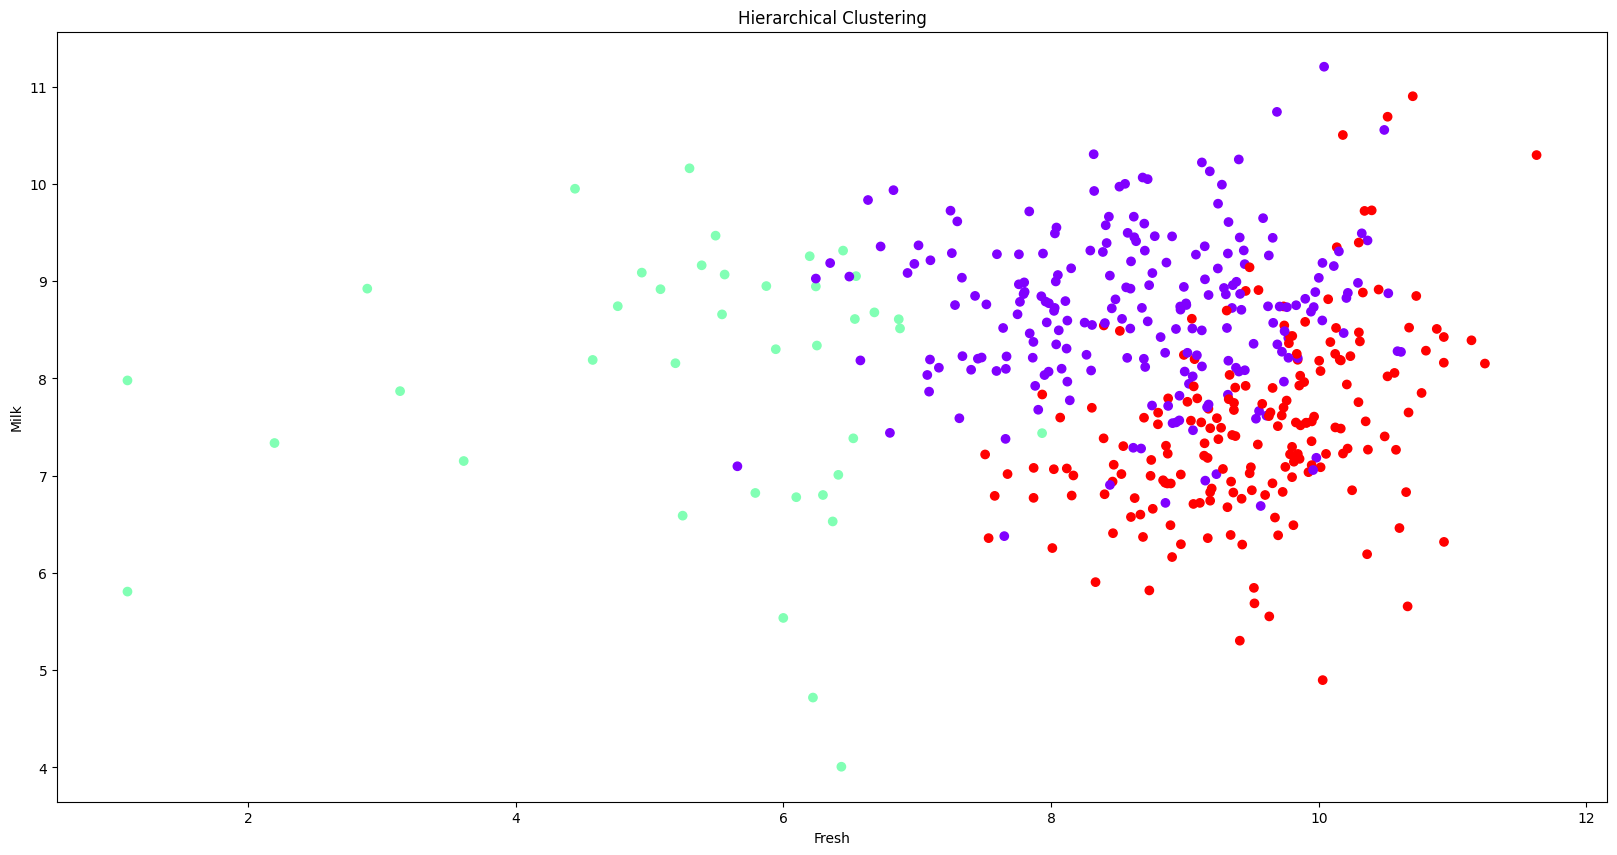

In [59]:
#See the difference between the clusters
plt.figure(figsize=(20,10))
plt.scatter(data_f['Fresh'], data_f['Milk'], c=dataframe['H_Cluster'], cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()

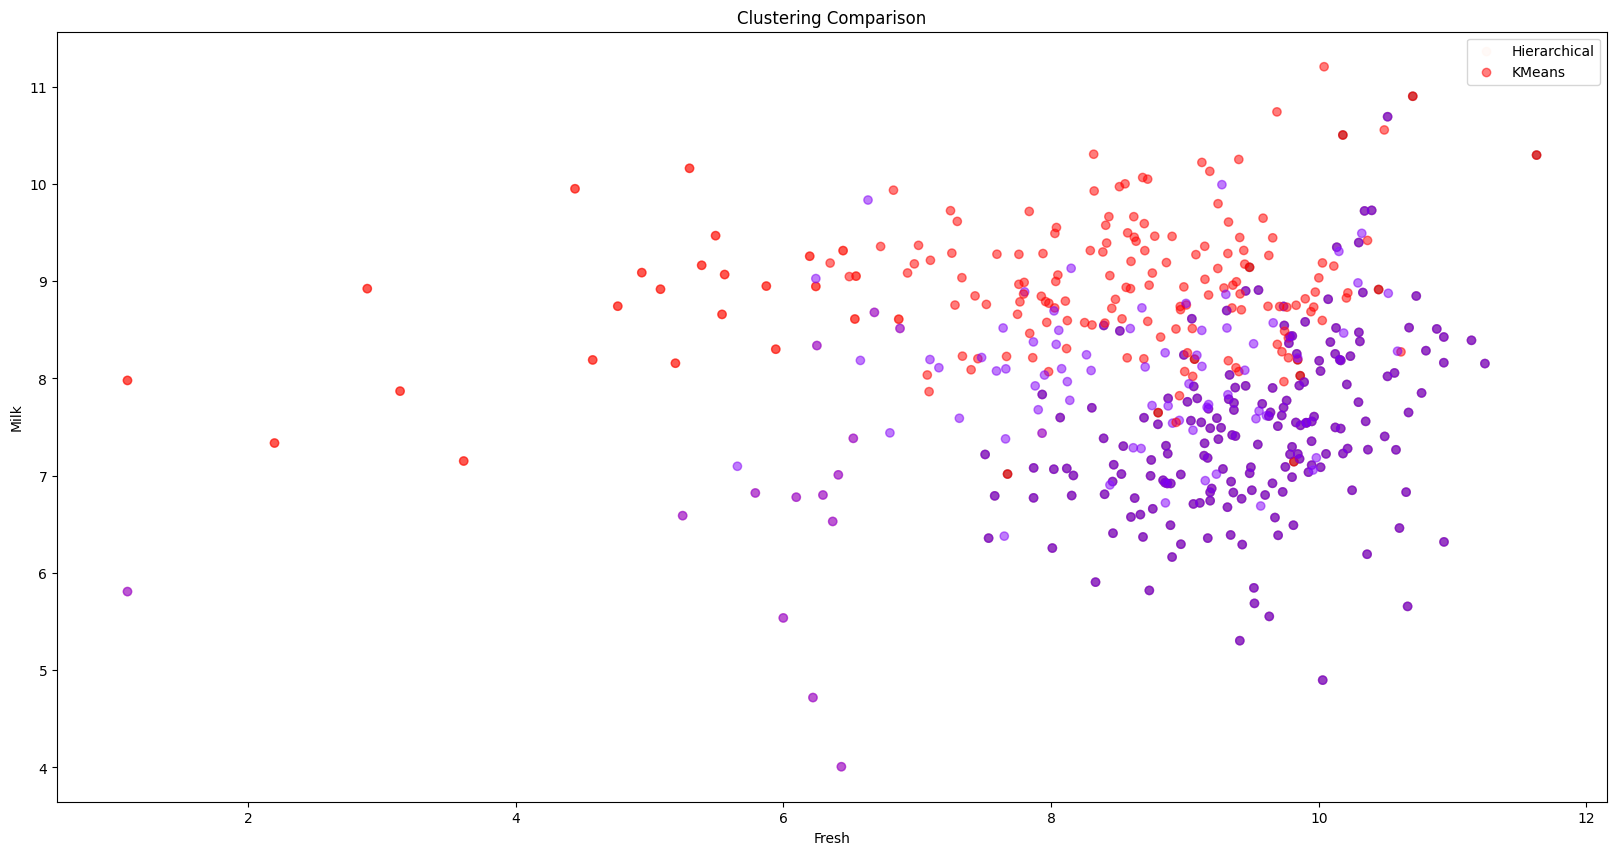

In [64]:
# Assuming dataframe['K_Cluster'] contains the cluster labels from KMeans
plt.figure(figsize=(20,10))

# Plot the points colored by hierarchical clustering labels
plt.scatter(data_f['Fresh'], data_f['Milk'], c=dataframe['H_Cluster'], cmap='Reds', label='Hierarchical', alpha=0.5)

# Plot the points colored by KMeans labels
plt.scatter(data_f['Fresh'], data_f['Milk'], c=dataframe['k_Cluster'], cmap='rainbow', label='KMeans', alpha=0.5)

plt.title('Clustering Comparison')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.legend()
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

For PCA components, I decided to use None as the value before so that I can see how much variance is being captured by the components first.
However, it's also important to check how much variance these two components are capturing. If they capture a significant amount of the total variance in the data, then using only these two components is likely a good choice. If not, I might need to consider using more components.

In [73]:
pca = PCA(n_components=None)
pca.fit(data_f)

# Print the explained variance ratio
print(pca.explained_variance_ratio_)

[0.40299353 0.23959605 0.15583638 0.10720371 0.07775559 0.01661474]


For PCA components, I decided to use 2 components as they are explaining a significant amount of the variation. It will also simplify my analysis and it makes visualization of the data easier. 

In [92]:
#Creating a PCA object
pca = PCA(n_components=2)
#Fitting the PCA object
principal_components = pca.fit_transform(data_f)
#Creating a dataframe with the principal components
principal_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
#Concatenating the principal components with the original dataframe
dataframe = pd.concat([dataframe, principal_df], axis=1)


In [93]:
dataframe.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,k_Cluster,H_Cluster,kk_Cluster,PCA_Cluster,PC1,PC2
0,2,3,12669,9656,7561,214,2674,1338,1,0,1,2,-0.191025,1.328448
1,2,3,7057,9810,9568,1762,3293,1776,1,0,1,2,0.614341,1.257041
2,2,3,6353,8808,7684,2405,3516,7844,1,0,1,2,1.377895,2.127268
3,1,3,13265,1196,4221,6404,507,1788,0,2,1,2,1.605668,-0.718111
4,2,3,22615,5410,7198,3915,1777,5185,1,0,1,2,2.307921,1.037691


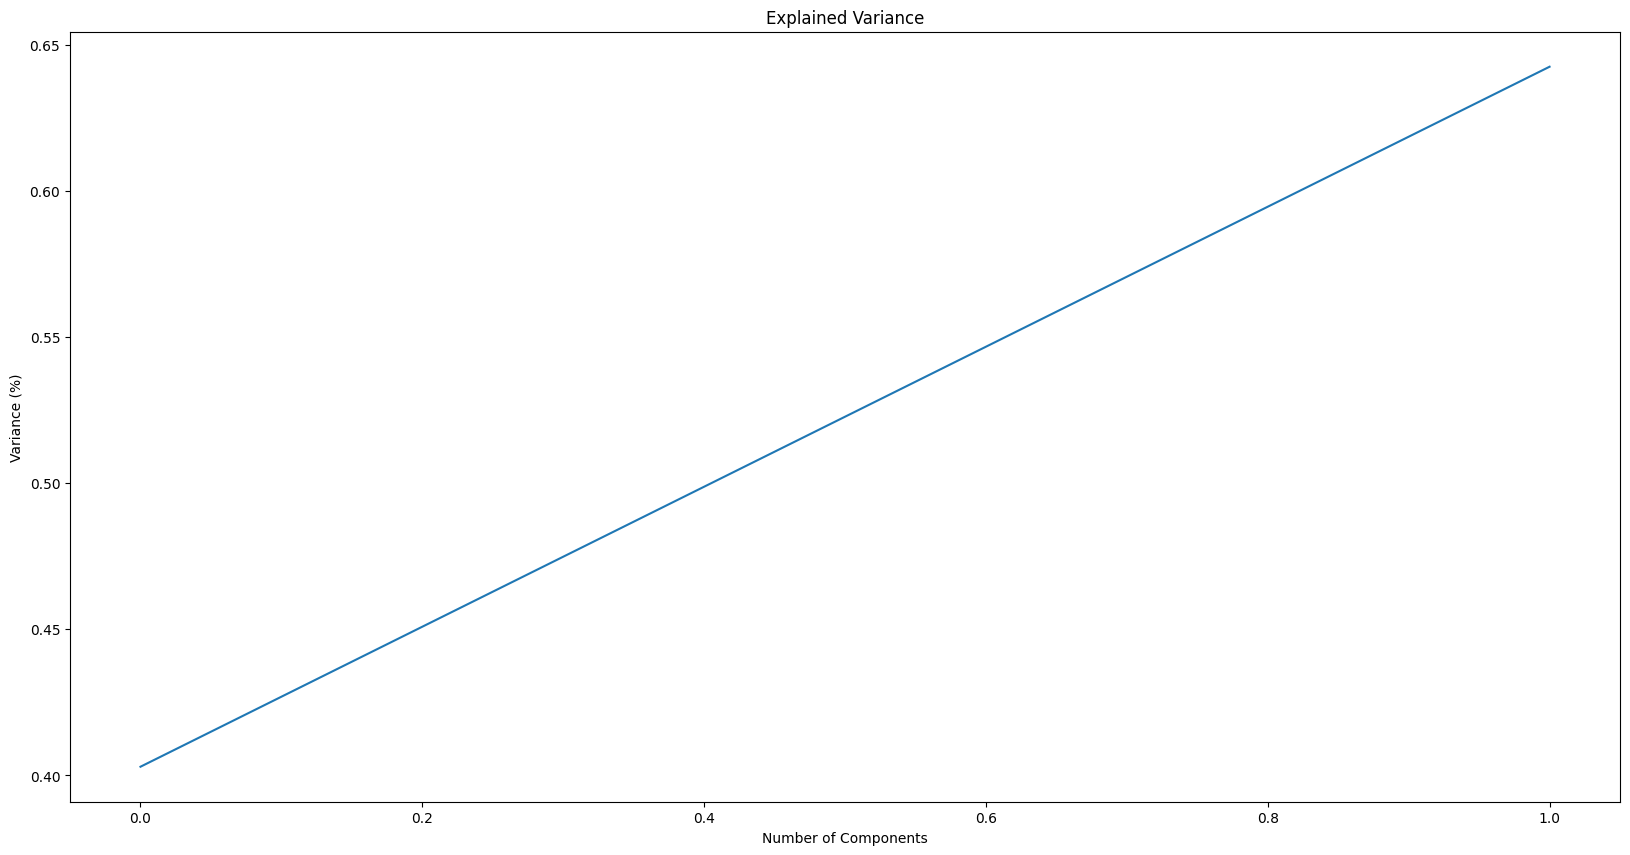

In [71]:
#Plotting the explained variance
plt.figure(figsize=(20,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()
#one component explains 65% of the variance


In [80]:
# Create a DataFrame of the principal component weights
components_df = pd.DataFrame(pca.components_, columns=data_f.columns, index=['PC1', 'PC2'])
# Print the principal component weights
print(components_df)

        Fresh      Milk    Frozen  Delicassen   Channel    Region
PC1  0.714738  0.079043  0.517746    0.461909 -0.035340 -0.015213
PC2 -0.324148  0.620094 -0.216231    0.653192  0.190998  0.022702


Looking at the component breakdown, we can see that they complement each other well. Each component is a combination of our features. The values are the weights of the features in the components. The higher the absolute value of the weight, the more important the corresponding feature is in calculating this component.

The first principal component is strongly influenced by the first, third, and fourth features, suggesting that these features vary together. If one increases, then the remaining ones tend to also increase. The second principal component is mostly a measure of the second and fourth features, with the first feature having a negative influence. This means that if the second and fourth features increase, the first feature tends to decrease, and vice versa. These two components allow us to reduce the dimensionality of our problem, while still retaining the variation present in our features.

Channel and region both do not have much importance here. 
The first principal component (PC1) is strongly influenced by the 'Fresh', 'Frozen', and 'Delicassen' features. This suggests that these three types of products vary together. If spending on one increases, then spending on the remaining ones also tends to increase. This component could be viewed as a measure of the customers' overall spending on these types of products.

The second principal component (PC2) is mostly a measure of the 'Milk' and 'Delicassen' features, with 'Fresh' having a negative influence. This means that if spending on 'Milk' and 'Delicassen' increases, spending on 'Fresh' tends to decrease, and vice versa. This component could be interpreted as representing the customers' preference for 'Milk' and 'Delicassen' over 'Fresh'.

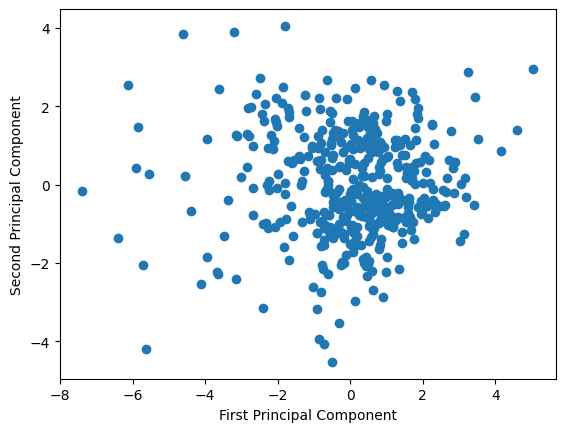

In [81]:
X_pca = pca.transform(data_f)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

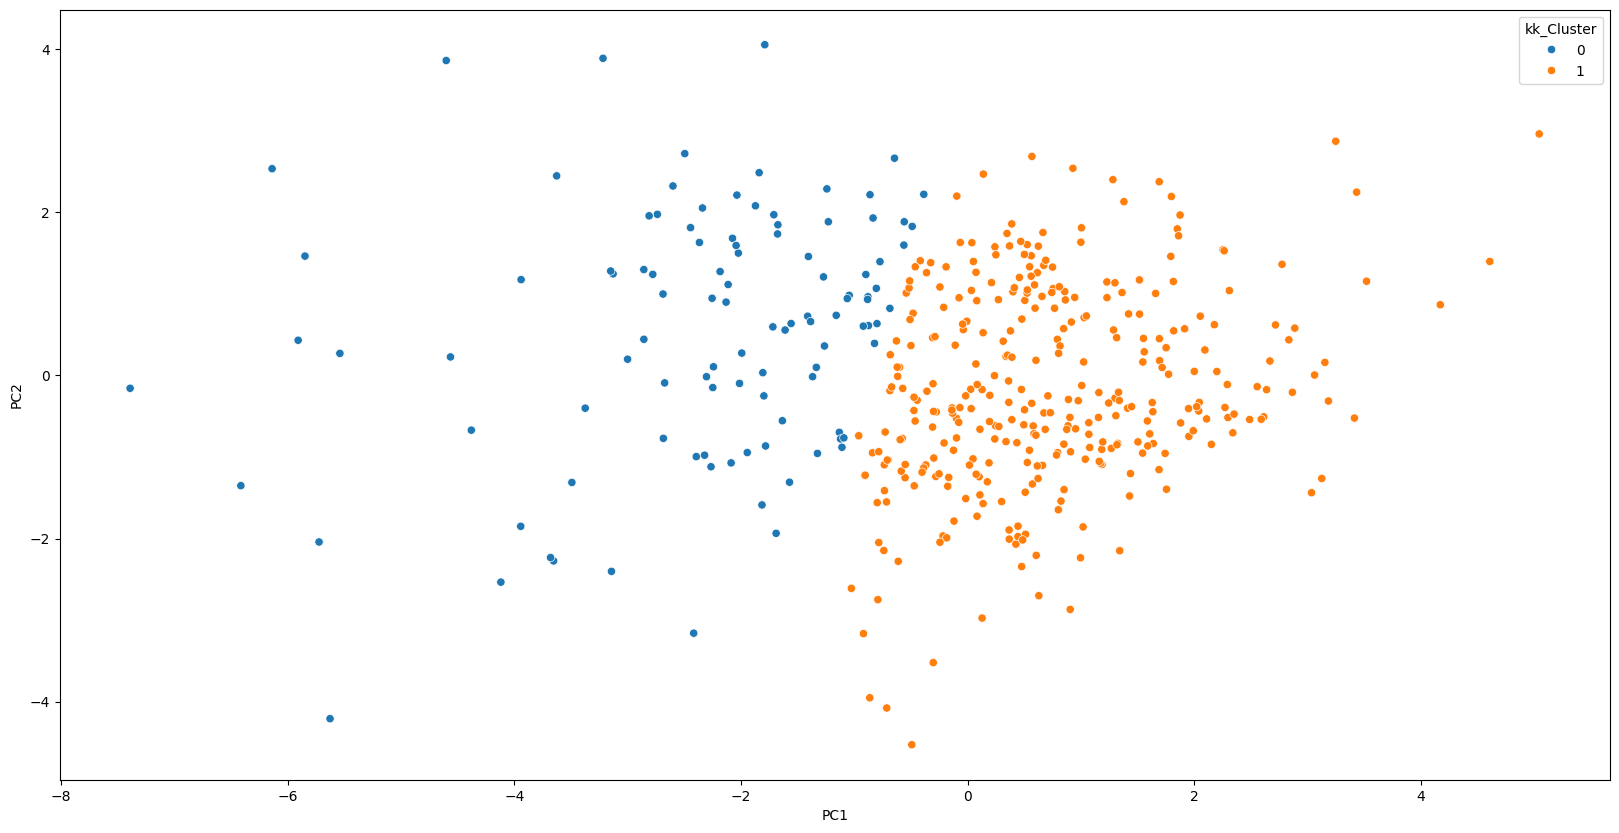

In [94]:
#Plotting the clusters
plt.figure(figsize=(20,10))
sns.scatterplot(data=dataframe, x='PC1', y='PC2', hue='kk_Cluster')
plt.show()

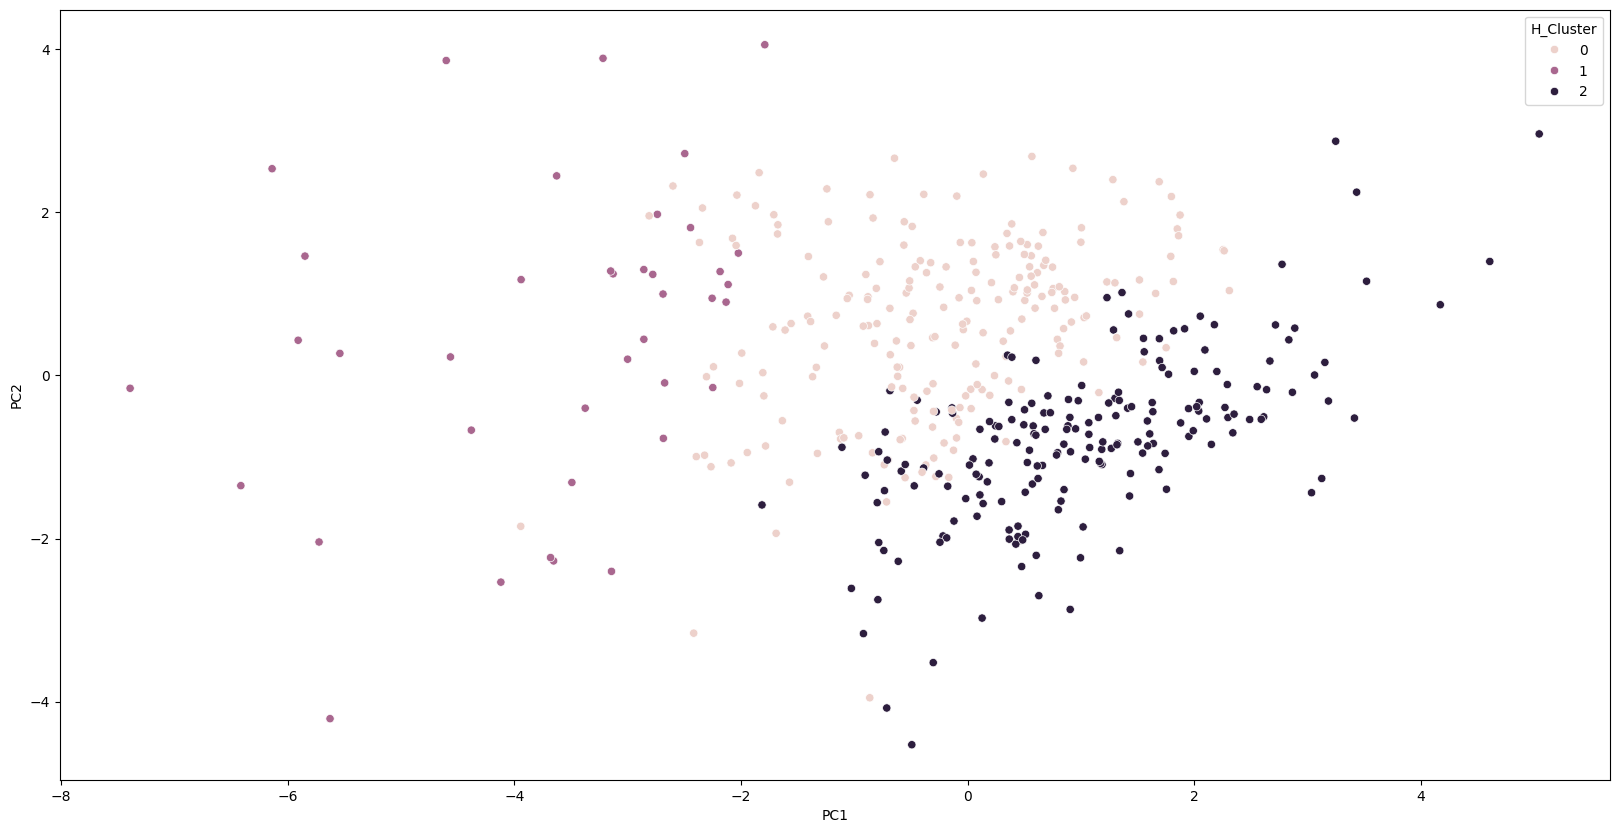

In [95]:
#Plotting the hierarchical clusters
plt.figure(figsize=(20,10))
sns.scatterplot(data=dataframe, x='PC1', y='PC2', hue='H_Cluster')
plt.show()

In [ ]:
#Improving the model

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.